In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
Y.value_counts()/768

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Scaling and splitting

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit(X).transform(X)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

## Model Fitting

In [15]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

In [42]:
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=4,
                                     max_leaf_nodes=9,min_samples_leaf=18)

In [43]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [44]:
bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=18,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

### Performance Report

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [47]:
print_score(bag_clf, X_train, Y_train, X_test, Y_test, train=True)

Train Result:

accuracy score: 0.8078

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.89      0.86       401
          1       0.76      0.65      0.70       213

avg / total       0.80      0.81      0.80       614


Confusion Matrix: 
 [[358  43]
 [ 75 138]]

Average Accuracy: 	 0.7556
Accuracy SD: 		 0.0361


In [49]:
print_score(bag_clf, X_train, Y_train, X_test, Y_test, train=False)

Test Result:

accuracy score: 0.7597

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.83      0.82        99
          1       0.67      0.64      0.65        55

avg / total       0.76      0.76      0.76       154


Confusion Matrix: 
 [[82 17]
 [20 35]]



### Now applying results achieved from feature selection

In [50]:
X = df[['Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [51]:
X_scaled = StandardScaler().fit(X).transform(X)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [53]:
bag_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=18,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [54]:
print_score(bag_clf, X_train, Y_train, X_test, Y_test, train=True)

Train Result:

accuracy score: 0.8078

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.89      0.86       401
          1       0.76      0.65      0.70       213

avg / total       0.80      0.81      0.80       614


Confusion Matrix: 
 [[358  43]
 [ 75 138]]

Average Accuracy: 	 0.7556
Accuracy SD: 		 0.0361


In [55]:
print_score(bag_clf, X_train, Y_train, X_test, Y_test, train=False)

Test Result:

accuracy score: 0.7597

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.83      0.82        99
          1       0.67      0.64      0.65        55

avg / total       0.76      0.76      0.76       154


Confusion Matrix: 
 [[82 17]
 [20 35]]



In [56]:
y_scores = bag_clf.predict(X_train)

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

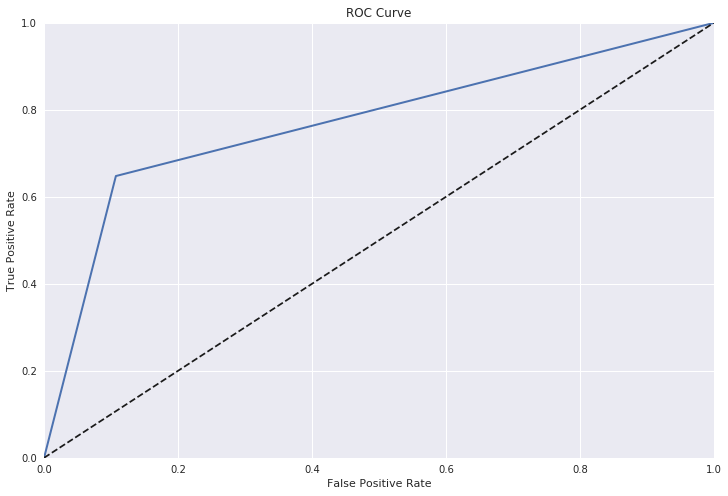

In [59]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(Y_train, y_scores)

0.77032770187208044

### Grid Search

In [63]:

from sklearn.model_selection import GridSearchCV 

In [95]:
params = {'max_features':list(range(1,6)),
          'max_samples':list(range(1,30))}

In [101]:
new_clf = GridSearchCV( BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=42,max_depth=4,
                                     max_leaf_nodes=9,min_samples_leaf=18), n_estimators=1000,
                            bootstrap=True, n_jobs=1,
                            random_state=42), params, n_jobs=1,
                            cv=3, verbose=1, scoring='accuracy') 

In [102]:
new_clf.fit(X_train,Y_train)

Fitting 3 folds for each of 145 candidates, totalling 435 fits


[Parallel(n_jobs=1)]: Done 435 out of 435 | elapsed:  7.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=18,
            min_samples_split=2, min_weight_fracti...n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4, 5], 'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [103]:
new_clf.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=18,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1,
         max_samples=1, n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [104]:
best = new_clf.best_estimator_.get_params() 

In [105]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.3f}'.format(k, best[k]))

	max_features: 	 1.000
	max_samples: 	 1.000


## Boosting

In [106]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
ada_clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=42,max_depth=4,
                                     max_leaf_nodes=9,min_samples_leaf=18), n_estimators=1000)

## Model Fitting after feature selection and scaling

In [108]:
ada_clf.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=18,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=None)

## Evaluation Report

In [109]:
print_score(bag_clf, X_train, Y_train, X_test, Y_test, train=True)

Train Result:

accuracy score: 0.8078

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.89      0.86       401
          1       0.76      0.65      0.70       213

avg / total       0.80      0.81      0.80       614


Confusion Matrix: 
 [[358  43]
 [ 75 138]]

Average Accuracy: 	 0.7556
Accuracy SD: 		 0.0361


In [110]:
print_score(bag_clf, X_train, Y_train, X_test, Y_test, train=False)

Test Result:

accuracy score: 0.7597

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.83      0.82        99
          1       0.67      0.64      0.65        55

avg / total       0.76      0.76      0.76       154


Confusion Matrix: 
 [[82 17]
 [20 35]]



## Roc Curve

In [122]:
from sklearn.metrics import roc_curve

In [123]:
y_scores = cross_val_predict(ada_clf, X_train, Y_train, cv=3, method='decision_function')

In [125]:
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

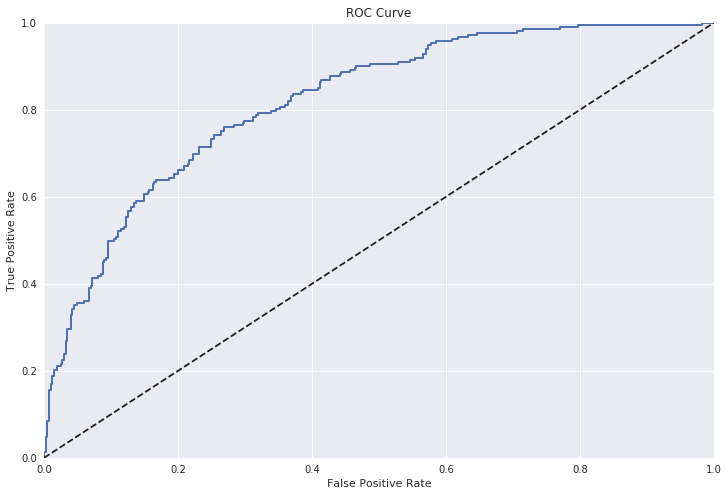

In [126]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [127]:
from sklearn.metrics import roc_auc_score

In [128]:
roc_auc_score(Y_train, y_scores)

0.81974640862632153